In [ ]:
!pip install wandb
import wandb
import os
import yaml
from shutil import copytree, ignore_patterns
import xml.etree.ElementTree as ET

In [ ]:
root_path = '/kaggle/input/fruit-images-for-object-detection/'
os.listdir(root_path)

['train_zip', 'test_zip']

In [ ]:
train_data_path = os.path.join(root_path,'train_zip/train')
test_data_path = os.path.join(root_path,'test_zip/test')

In [ ]:
train_data_description = os.listdir(train_data_path)
test_data_description = os.listdir(test_data_path)

In [ ]:
train_annotation_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.xml' in i]
train_image_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.jpg' in i]

test_annotation_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.xml' in i]
test_image_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.jpg' in i]

In [ ]:
print(f'length of training Data {len(train_image_file_paths)}, length of test data {len(test_image_file_paths)}')

length of training Data 240, length of test data 60


In [ ]:
for i in ['train/labels','test/labels']:
    os.makedirs(os.path.join('/kaggle/working/object_detection/',i))

In [ ]:
copytree(train_data_path,'/kaggle/working/object_detection/train/images/',ignore = ignore_patterns('*.xml'))
copytree(test_data_path,'/kaggle/working/object_detection/test/images/',ignore = ignore_patterns('*.xml'))

'/kaggle/working/object_detection/test/images/'

In [ ]:
def convert_xml_to_txt(label_path,xml_file,class_dict,destination_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    x=root.find('filename').text
    txt_file = x.replace('.jpg','.txt')
    txt_file = os.path.join(destination_file,txt_file)
    with open(txt_file,'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_dict:
                continue
            class_id = class_dict[class_name]
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            xmax = int(bbox.find('xmax').text)
            ymin = int(bbox.find('ymin').text)
            ymax = int(bbox.find('ymax').text)

            image_width = int(root.find('size/width').text)
            image_height = int(root.find('size/height').text)

            x_center = (xmin + xmax) / 2 / image_width if image_width != 0 else (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2 / image_height if image_height != 0 else (ymin + ymax) / 2
            width = (xmax - xmin) / image_width if image_width != 0 else (xmax - xmin)
            height = (ymax - ymin) / image_height if image_height != 0 else (ymax - ymin)

            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

In [ ]:
class_dict = {'apple':0,'banana':1,'orange':2}


dest_path = '/kaggle/working/object_detection/train/labels/'
for i in train_annotation_file_paths:
    convert_xml_to_txt(train_data_path,i,class_dict,dest_path)


dest_path = '/kaggle/working/object_detection/test/labels/'
for i in test_annotation_file_paths:
    convert_xml_to_txt(test_data_path,i,class_dict,dest_path)

In [ ]:
yaml_path = "/kaggle/input/pranavbalajirs/pranavbalajirs.yaml"

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 18.4 MB/s eta 0:00:0000:01


In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')

In [ ]:
wandb.login(key='7f57f2919952083b65dd6978e611ea7a88a22160')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
results = model.train(data=yaml_path, epochs=50, batch=4)

Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/pranavbalajirs/pranavbalajirs.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]
2024-03-21 18:41:24,708	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-21 18:41:25,552	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-21 18:41:28.055832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 18:41:28.055938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 18:41:28.189502: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Currently logged in as: coinershot. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 91.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/object_detection/train/labels... 240 images, 0 backgrounds, 33 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1037.13it/s]

train: WARNING ⚠️ /kaggle/working/object_detection/train/images/apple_1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      169.5         182         323         334]
train: WARNING ⚠️ /kaggle/working/object_detection/train/images/apple_17.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        348         479         470         442]
train: WARNING ⚠️ /kaggle/working/object_detection/train/images/apple_20.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      240.5         276         435         442]
train: WARNING ⚠️ /kaggle/working/object_detection/train/images/apple_28.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        150       169.5         250         255]
train: WARNING ⚠️ /kaggle/working/object_detection/train/images/apple_37.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      179.5         191         287     

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/object_detection/test/labels... 60 images, 0 backgrounds, 4 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1164.20it/s]

val: WARNING ⚠️ /kaggle/working/object_detection/test/images/apple_79.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        359       449.5         564         533]
val: WARNING ⚠️ /kaggle/working/object_detection/test/images/apple_92.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      308.5         296         463         444]
val: WARNING ⚠️ /kaggle/working/object_detection/test/images/banana_87.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      489.5       155.5         213         305         389       145.5         248         261         639       183.5         246         263         729       183.5         180         283]
val: WARNING ⚠️ /kaggle/working/object_detection/test/images/orange_94.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      241.5         164         261         226]
val: New cache created: /kaggle/working/object_detection/t

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      0.74G      2.965      3.978        4.2         12        640: 100%|██████████| 52/52 [00:08<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all         56        110    0.00574      0.744    0.00713    0.00225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50     0.761G      2.969      3.856      4.083         18        640: 100%|██████████| 52/52 [00:05<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.43it/s]

                   all         56        110    0.00468      0.695      0.023    0.00692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50     0.761G      2.953       3.67      3.899         16        640: 100%|██████████| 52/52 [00:05<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.31it/s]

                   all         56        110      0.365      0.203     0.0428     0.0134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50     0.761G      2.877      3.487      3.734         14        640: 100%|██████████| 52/52 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 12.52it/s]

                   all         56        110      0.698     0.0808      0.036     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50     0.761G      2.799      3.379      3.597         14        640: 100%|██████████| 52/52 [00:05<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 11.71it/s]

                   all         56        110     0.0513       0.16      0.028    0.00776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50     0.761G       2.81      3.303       3.51         14        640: 100%|██████████| 52/52 [00:05<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.29it/s]

                   all         56        110     0.0498      0.222     0.0464     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50     0.761G      2.756      3.329      3.466         12        640: 100%|██████████| 52/52 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.34it/s]

                   all         56        110     0.0516      0.272     0.0393     0.0101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50     0.761G      2.638      3.229      3.359         14        640: 100%|██████████| 52/52 [00:05<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.13it/s]

                   all         56        110      0.146        0.2     0.0978     0.0245



      12/50     0.761G      2.431          3      3.077         20        640: 100%|██████████| 52/52 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.69it/s]

                   all         56        110      0.136      0.322       0.12     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50     0.761G      2.403      2.968      3.057         13        640: 100%|██████████| 52/52 [00:05<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.55it/s]

                   all         56        110      0.276      0.258      0.168     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50     0.761G      2.386      2.945       2.98         18        640: 100%|██████████| 52/52 [00:05<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.18it/s]

                   all         56        110      0.137      0.423      0.161     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50     0.761G      2.377      2.898      2.982          6        640: 100%|██████████| 52/52 [00:05<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.31it/s]

                   all         56        110      0.414      0.227      0.176     0.0585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50     0.761G      2.298      2.853      2.904         17        640: 100%|██████████| 52/52 [00:05<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.50it/s]

                   all         56        110      0.206      0.508      0.195     0.0732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50     0.761G      2.336      2.875      2.943         11        640: 100%|██████████| 52/52 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.38it/s]

                   all         56        110      0.204      0.426      0.201     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50     0.761G      2.296       2.87      2.906         10        640: 100%|██████████| 52/52 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.18it/s]

                   all         56        110      0.293      0.372      0.266      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50     0.761G      2.265      2.837      2.902         12        640: 100%|██████████| 52/52 [00:05<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.36it/s]

                   all         56        110      0.267      0.364      0.286      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50     0.761G      2.225      2.805      2.824         10        640: 100%|██████████| 52/52 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.63it/s]

                   all         56        110       0.28       0.44      0.323      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50     0.761G      2.215      2.739       2.79         19        640: 100%|██████████| 52/52 [00:05<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.28it/s]

                   all         56        110        0.3      0.434      0.314      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50     0.761G      2.156      2.723      2.755          4        640: 100%|██████████| 52/52 [00:05<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.91it/s]

                   all         56        110       0.34       0.33      0.306      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50     0.761G      2.088      2.651      2.704         21        640: 100%|██████████| 52/52 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.13it/s]

                   all         56        110      0.583      0.274      0.356      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50     0.761G      2.119       2.58      2.686         18        640: 100%|██████████| 52/52 [00:05<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.32it/s]


                   all         56        110      0.344       0.33      0.324      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50     0.761G      2.063      2.544      2.639         12        640: 100%|██████████| 52/52 [00:05<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 13.24it/s]

                   all         56        110      0.285      0.335       0.28      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50     0.761G      2.054      2.554      2.652          8        640: 100%|██████████| 52/52 [00:05<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.66it/s]

                   all         56        110      0.493      0.505      0.445      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50     0.761G      2.034       2.51      2.641         13        640: 100%|██████████| 52/52 [00:05<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.14it/s]


                   all         56        110      0.536      0.384      0.457       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.761G      1.992      2.521      2.596         13        640: 100%|██████████| 52/52 [00:05<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.31it/s]


                   all         56        110      0.377      0.402      0.369      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50     0.759G      2.056       2.59      2.634         13        640: 100%|██████████| 52/52 [00:05<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.75it/s]


                   all         56        110      0.284      0.451      0.309      0.163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50     0.761G      2.013      2.445      2.551         12        640: 100%|██████████| 52/52 [00:05<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.70it/s]

                   all         56        110      0.369      0.476      0.345      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50     0.761G      1.942       2.42      2.528         17        640: 100%|██████████| 52/52 [00:05<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.78it/s]

                   all         56        110      0.462      0.447      0.423      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50     0.761G      1.955      2.461      2.534         17        640: 100%|██████████| 52/52 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.25it/s]


                   all         56        110      0.607      0.367      0.484      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50     0.759G      1.901      2.352      2.466         12        640: 100%|██████████| 52/52 [00:05<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.26it/s]


                   all         56        110      0.508      0.433      0.429      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50     0.759G      1.885      2.336      2.468         20        640: 100%|██████████| 52/52 [00:05<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.47it/s]


                   all         56        110      0.438      0.465      0.402      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50     0.761G      1.895      2.324      2.459         18        640: 100%|██████████| 52/52 [00:05<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.12it/s]

                   all         56        110        0.4       0.45      0.376      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50     0.761G      1.869      2.311      2.443         13        640: 100%|██████████| 52/52 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.47it/s]


                   all         56        110      0.432      0.451      0.435      0.234

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50     0.761G      1.839      2.252       2.42         10        640: 100%|██████████| 52/52 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.52it/s]

                   all         56        110      0.437      0.436      0.428       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50     0.759G      1.766      2.213      2.343         18        640: 100%|██████████| 52/52 [00:05<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.30it/s]

                   all         56        110      0.487      0.509      0.499      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50     0.759G      1.832      2.309       2.42         11        640: 100%|██████████| 52/52 [00:05<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.80it/s]


                   all         56        110      0.573      0.469      0.491      0.271
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50     0.759G      1.621      2.578      2.334          5        640: 100%|██████████| 52/52 [00:05<00:00,  9.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.54it/s]

                   all         56        110      0.596      0.462      0.543       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50     0.761G      1.644      2.452      2.369          6        640: 100%|██████████| 52/52 [00:05<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.91it/s]


                   all         56        110      0.465      0.572      0.502      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50     0.761G      1.574      2.353      2.247          8        640: 100%|██████████| 52/52 [00:04<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.98it/s]

                   all         56        110      0.526      0.459      0.512      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50     0.759G      1.535      2.216      2.254          3        640: 100%|██████████| 52/52 [00:05<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.61it/s]


                   all         56        110      0.667      0.457      0.579      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50     0.761G      1.539      2.206      2.248         11        640: 100%|██████████| 52/52 [00:04<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.84it/s]

                   all         56        110      0.576      0.522      0.559      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50     0.759G      1.495       2.17      2.186         10        640: 100%|██████████| 52/52 [00:04<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.78it/s]

                   all         56        110      0.606       0.51      0.544      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50     0.759G      1.541      2.177      2.266          6        640: 100%|██████████| 52/52 [00:04<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.34it/s]

                   all         56        110      0.663        0.5      0.567      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50     0.761G      1.513      2.131      2.208          6        640: 100%|██████████| 52/52 [00:05<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 15.22it/s]


                   all         56        110      0.663      0.491      0.582      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50     0.759G      1.485      2.101      2.173          3        640: 100%|██████████| 52/52 [00:05<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.99it/s]

                   all         56        110      0.649      0.544      0.601      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50     0.759G        1.5       2.12      2.203          5        640: 100%|██████████| 52/52 [00:05<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 14.55it/s]


                   all         56        110      0.563      0.572      0.594       0.38

50 epochs completed in 0.096 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.30 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.60it/s]


                   all         56        110      0.653      0.535      0.601      0.386
                 apple         56         33      0.604      0.606      0.665       0.46
                banana         56         36      0.667      0.389      0.449      0.218
                orange         56         41      0.689       0.61       0.69      0.479
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 7.9ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆████▇▇▇▇▇▇▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▁▁▁▁▁▂▃▂▂▃▃▃▃▄▄▅▅▅▅▆▆▅▅▆▇▆▆▆▆▆▇▇▇▇█▇███
metrics/mAP50-95(B),▁▁▁▁▁▁▁▂▂▂▂▂▂▂▃▃▄▄▄▄▅▅▅▄▅▆▆▅▅▆▆▆▇▇▇▇▇███
metrics/precision(B),▁▁▅█▁▁▂▃▂▂▄▂▃▃▄▄▄▄▇▄▆▆▅▄▆▇▆▅▅▅▅▆▇▆▆█▇███
metrics/recall(B),█▇▂▁▂▃▂▃▂▄▃▅▆▅▄▄▅▄▃▄▅▄▄▅▅▄▅▅▅▅▅▆▅▆▅▅▆▅▅▆
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,████▇▇▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▃▄▃▃▃▃▃▃▃▂▂▂▁▁▁▁▁▁


In [ ]:
Test_image_results = model('/kaggle/working/object_detection/test/images/apple_77.jpg')


image 1/1 /kaggle/working/object_detection/test/images/apple_77.jpg: 512x640 3 apples, 55.1ms
Speed: 1.8ms preprocess, 55.1ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 640)


In [ ]:
Test_image_results[0].boxes.data.tolist()

[[126.56220245361328,
  135.24916076660156,
  213.52859497070312,
  228.41244506835938,
  0.7141468524932861,
  0.0],
 [210.76666259765625,
  141.21092224121094,
  300.0,
  229.0,
  0.6847565770149231,
  0.0],
 [71.64437103271484,
  63.38236999511719,
  167.55747985839844,
  157.936279296875,
  0.32651612162590027,
  0.0]]

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/kaggle/input/baoooo/bao.jpeg')
copy_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_dict = {0:'apple',1:'banana',2:'orange'}

for bbox in Test_image_results[0].boxes.data.tolist():
    x1, y1, x2, y2,confidence,label = bbox

    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    cv2.putText(image, img_dict[int(label)], (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

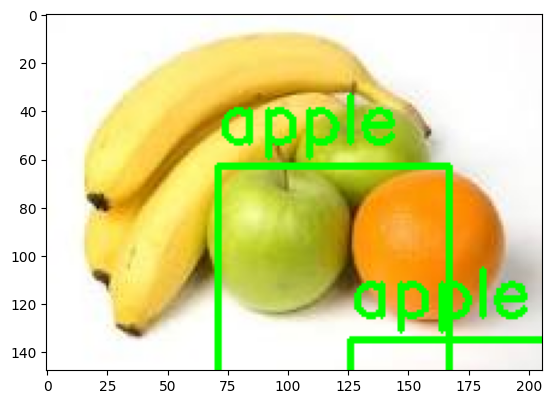

In [ ]:
plt.imshow(image_rgb)